<a href="https://colab.research.google.com/github/Tsiketa/InterParRangeKutta/blob/master/directViaColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Informations sur l'étudiant:**

**Nom :** RAHARISON  
**Prénom(s) :** Santatriniaina Tiantsoa  
**Classe :** ESIIA 4  
**Numéro :**  

---

# Analyse de données avec Régression Linéaire

**Jeu de données : California Housing (prix des logements en Californie)**

Ce notebook présente un workflow complet d'analyse de données en utilisant un modèle de régression linéaire pour prédire le prix médian des logements en Californie à partir de caractéristiques géographiques et démographiques.

## 1. Chargement et inspection des données

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Configuration graphique
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


In [26]:
# Charger le jeu de données California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print(f"Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nVariable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)")
print(f"\nDescription des variables :")
print("-" * 60)
descriptions = {
'MedInc': 'Revenu médian du quartier',
'HouseAge': 'Âge médian des logements',
'AveRooms': 'Nombre moyen de pièces par logement',
'AveBedrms': 'Nombre moyen de chambres par logement',
'Population': 'Population du quartier',
'AveOccup': 'Nombre moyen d\'occupants par logement',
'Latitude': 'Latitude géographique',
'Longitude': 'Longitude géographique',
'MedHouseVal': 'Prix médian du logement (cible)'
}
for col, desc in descriptions.items():
  print(f" {col:15s} → {desc}")

Dimensions du dataset : 20640 lignes × 9 colonnes

Variable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)

Description des variables :
------------------------------------------------------------
 MedInc          → Revenu médian du quartier
 HouseAge        → Âge médian des logements
 AveRooms        → Nombre moyen de pièces par logement
 AveBedrms       → Nombre moyen de chambres par logement
 Population      → Population du quartier
 AveOccup        → Nombre moyen d'occupants par logement
 Latitude        → Latitude géographique
 Longitude       → Longitude géographique
 MedHouseVal     → Prix médian du logement (cible)


Étape 1 — Chargement et inspection

In [27]:
# Aperçu des premières lignes
print(df.head())

# Types et valeurs manquantes
df.info()

# Statistiques descriptives
df.describe()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 2. Nettoyage des données

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Doublons : 0


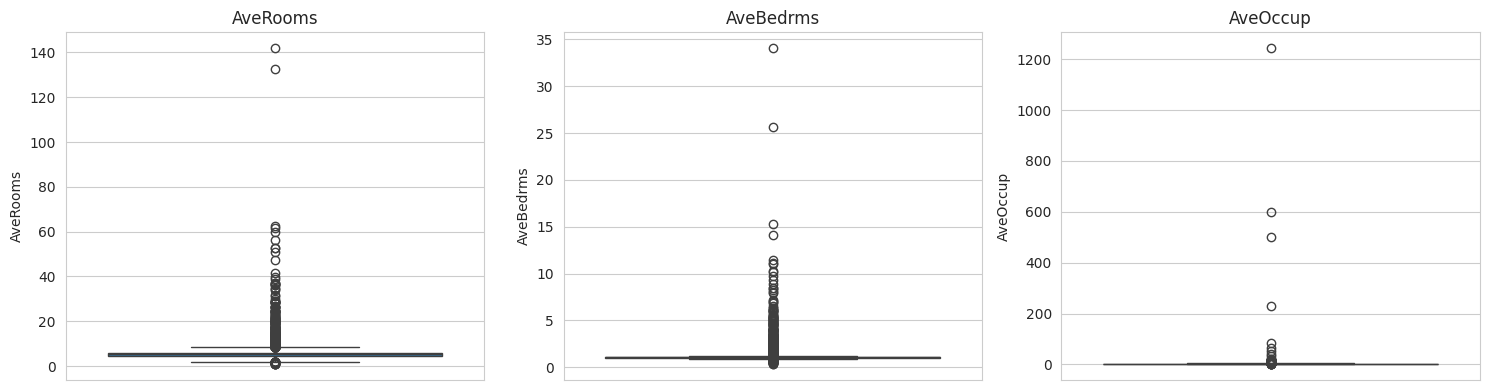

Dimensions après nettoyage : (20620, 9)


In [28]:
# Valeurs manquantes
print(df.isnull().sum())

# Doublons
print(f"Doublons : {df.duplicated().sum()}")
df = df.drop_duplicates()

# Boxplots pour détecter les outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, ['AveRooms', 'AveBedrms', 'AveOccup']):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# Filtrer les outliers extrêmes
df = df[df['AveRooms'] < 50]
df = df[df['AveBedrms'] < 10]
df = df[df['AveOccup'] < 20]
print(f"Dimensions après nettoyage : {df.shape}")

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Doublons : 0


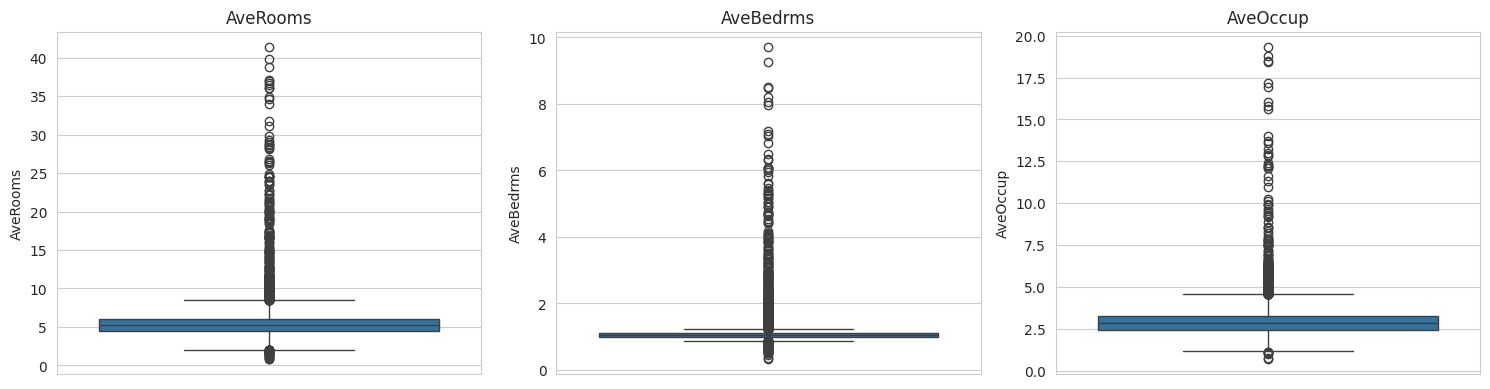

Dimensions après nettoyage : (20620, 9)


In [29]:
# Valeurs manquantes
print(df.isnull().sum())

# Doublons
print(f"Doublons : {df.duplicated().sum()}")
df = df.drop_duplicates()

# Boxplots pour détecter les outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, ['AveRooms', 'AveBedrms', 'AveOccup']):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# Filtrer les outliers extrêmes
df = df[df['AveRooms'] < 50]
df = df[df['AveBedrms'] < 10]
df = df[df['AveOccup'] < 20]
print(f"Dimensions après nettoyage : {df.shape}")

## 3. Analyse exploratoire (EDA)

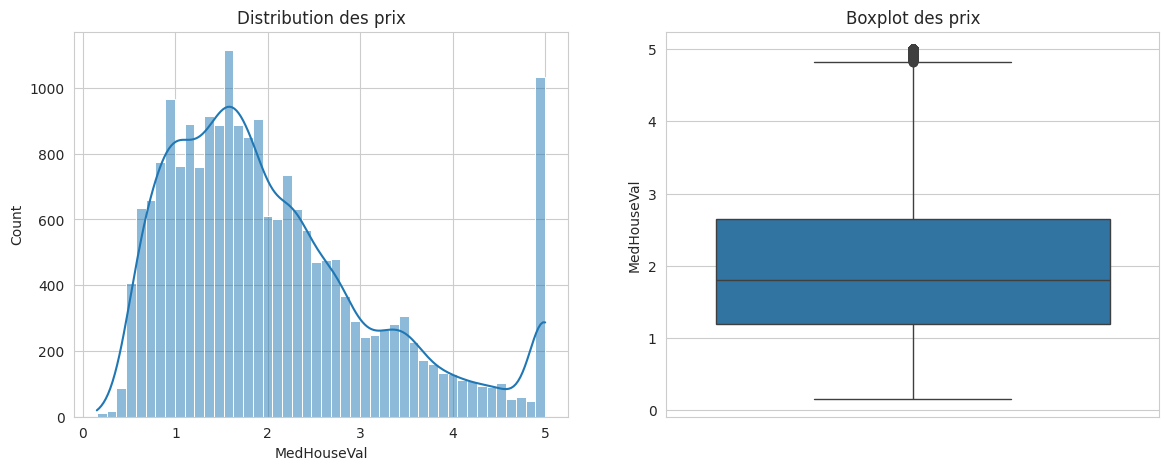

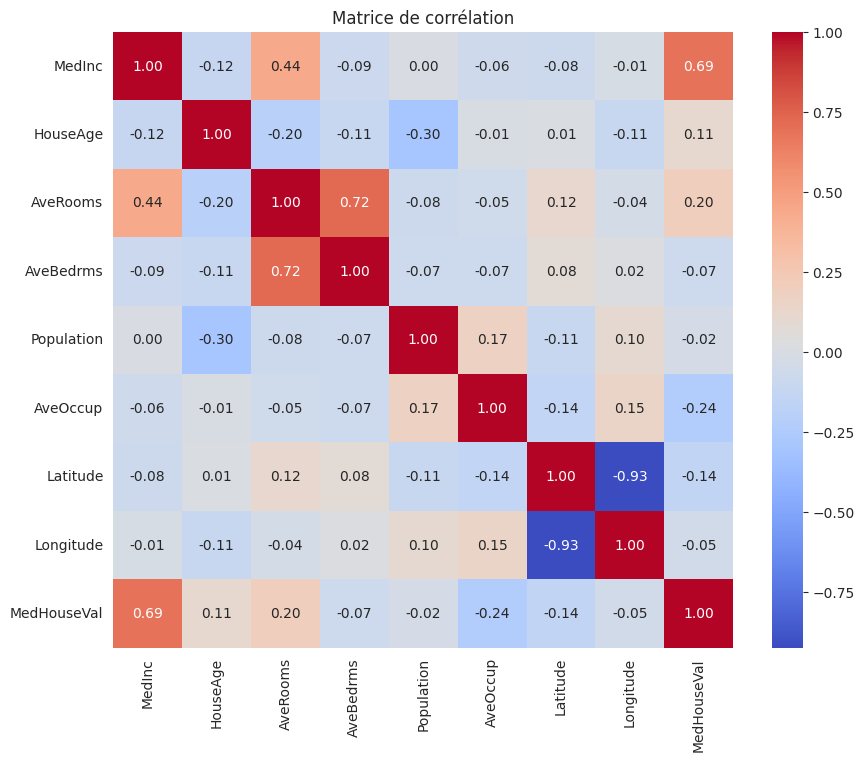

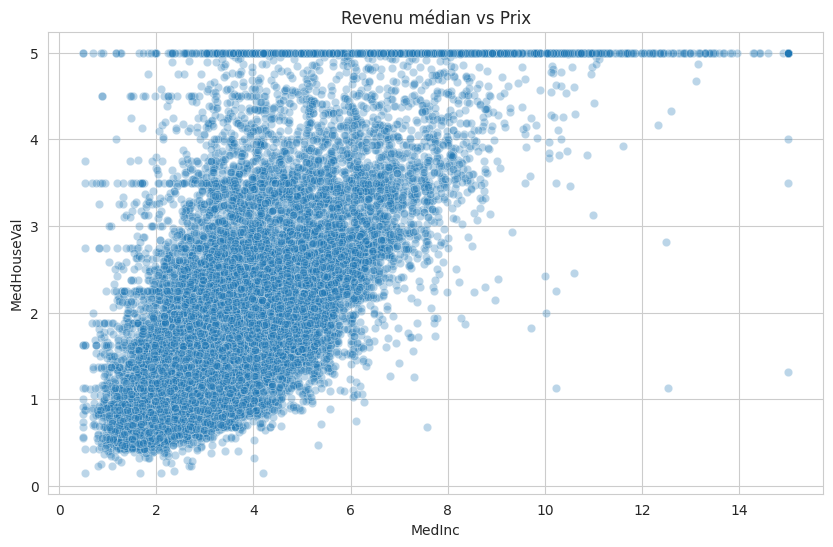

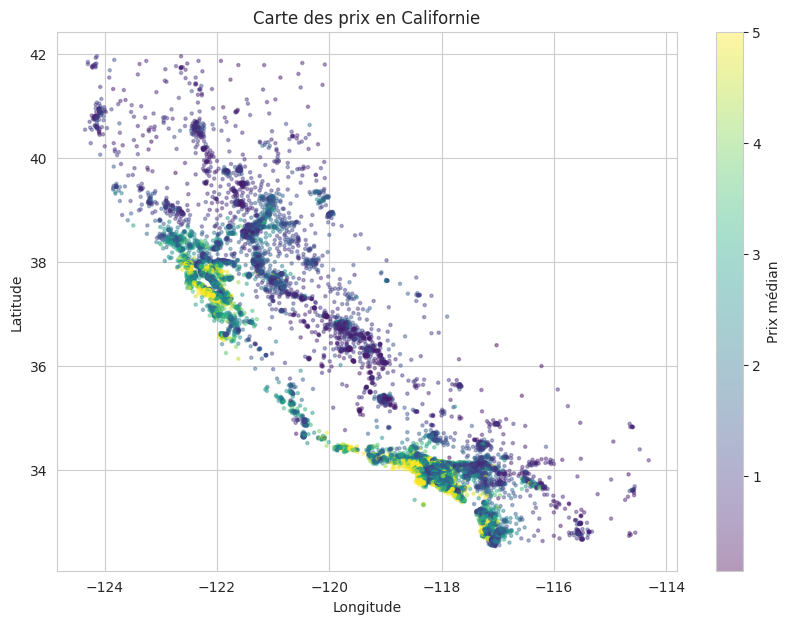

In [30]:
# Distribution de la cible
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['MedHouseVal'], kde=True, ax=axes[0])
axes[0].set_title("Distribution des prix")
sns.boxplot(y=df['MedHouseVal'], ax=axes[1])
axes[1].set_title("Boxplot des prix")
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Scatter plot MedInc vs MedHouseVal
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'], alpha=0.3)
plt.title("Revenu médian vs Prix")
plt.show()

# Carte géographique
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['Longitude'], df['Latitude'],
                      c=df['MedHouseVal'], cmap='viridis', alpha=0.4, s=5)
plt.colorbar(scatter, label='Prix médian')
plt.title("Carte des prix en Californie")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## 4. Ingénierie des variables

In [31]:
# Nouvelles features
df['PiecesParChambre'] = df['AveRooms'] / df['AveBedrms']
df['PopParLogement']   = df['Population'] / df['AveOccup']

# Séparation X / y
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

## 5. Split train/test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train : {X_train.shape} | Test : {X_test.shape}")

Train : (16496, 10) | Test : (4124, 10)


## 6. Construction du modèle de régression linéaire

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept (β₀) : {model.intercept_:.4f}")
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

Intercept (β₀) : -33.5301
           Variable  Coefficient
0            MedInc     0.440050
6          Latitude    -0.418171
7         Longitude    -0.416648
8  PiecesParChambre    -0.227512
3         AveBedrms    -0.213081
5          AveOccup    -0.175447
2          AveRooms     0.089642
1          HouseAge     0.010921
9    PopParLogement     0.000643
4        Population    -0.000183


## 7. Prédiction et évaluation

In [34]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

MSE  : 0.4560
RMSE : 0.6753
MAE  : 0.4904
R²   : 0.6483


## 8. Visualisation des résultats

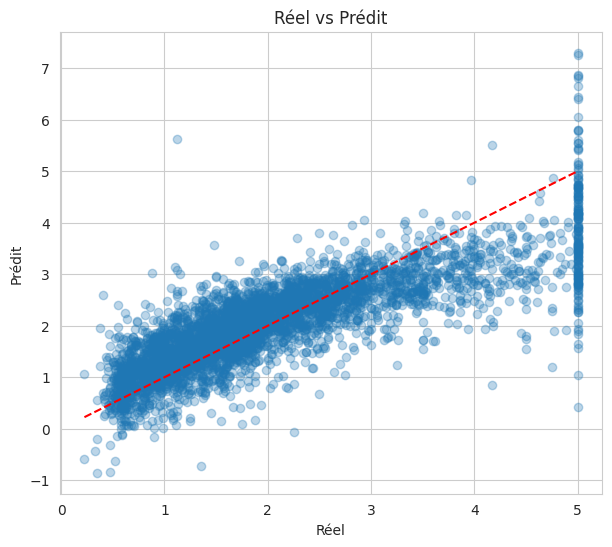

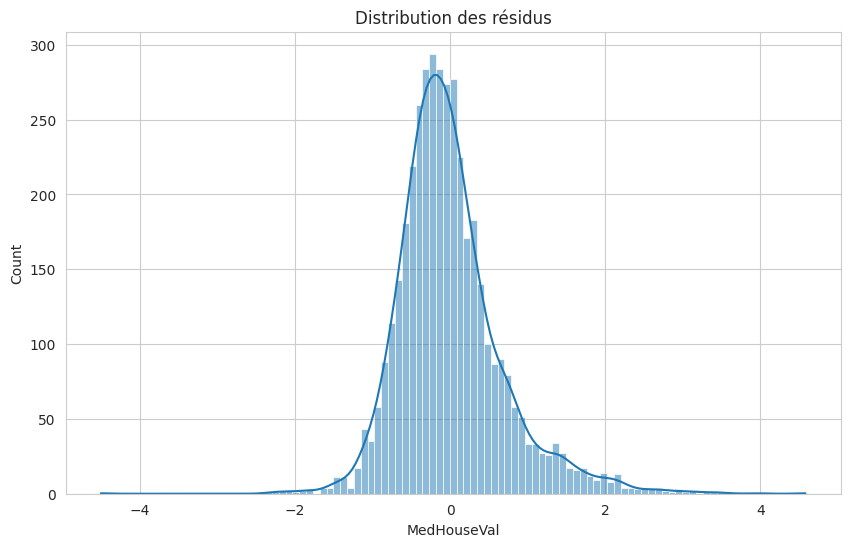

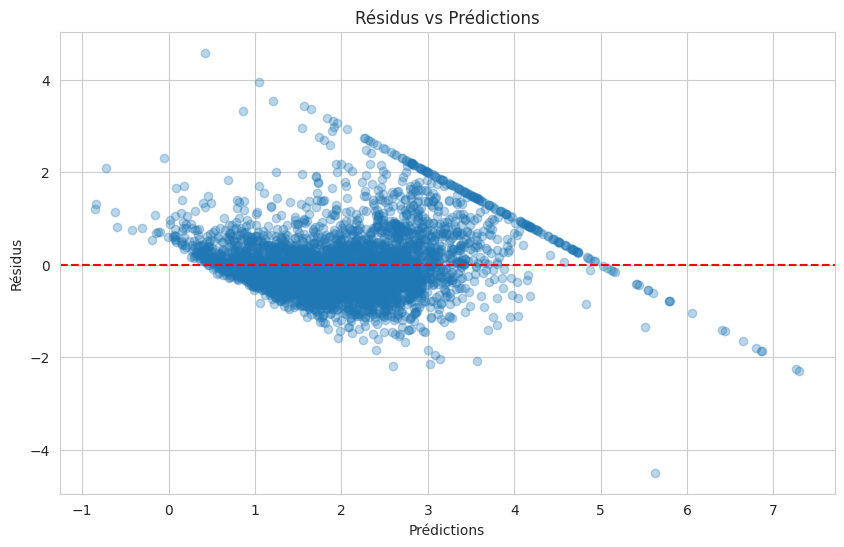

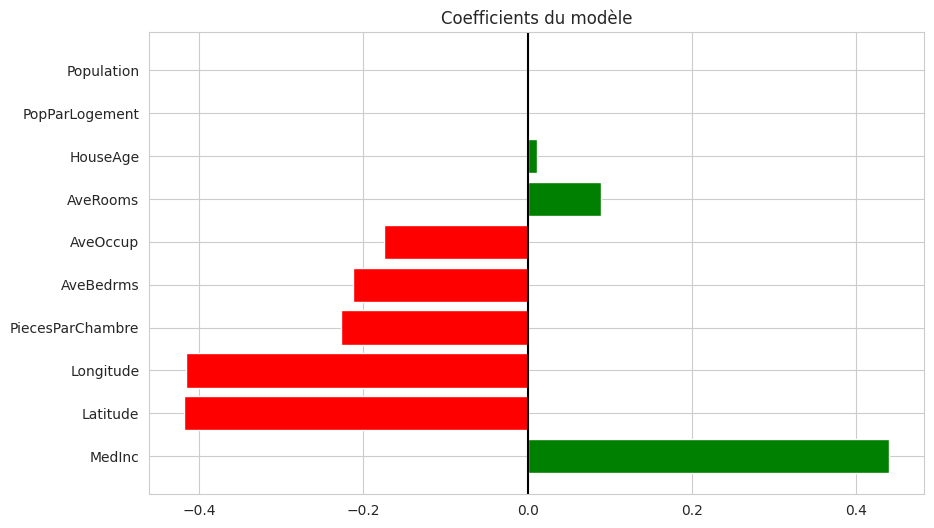

In [35]:
residus = y_test - y_pred

# 1. Réel vs Prédit
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Réel") ; plt.ylabel("Prédit")
plt.title("Réel vs Prédit")
plt.show()

# 2a. Histogramme des résidus
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

# 2b. Résidus vs Prédictions
plt.scatter(y_pred, residus, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Prédictions") ; plt.ylabel("Résidus")
plt.title("Résidus vs Prédictions")
plt.show()

# 3. Coefficients
colors = ['green' if c > 0 else 'red' for c in coef_df['Coefficient']]
plt.barh(coef_df['Variable'], coef_df['Coefficient'], color=colors)
plt.title("Coefficients du modèle")
plt.axvline(0, color='black')
plt.show()

## 9. Export des résultats

In [36]:
resultats = X_test.copy()
resultats['Prix_Réel']    = y_test.values
resultats['Prix_Prédit']  = y_pred
resultats['Résidu']       = residus.values
resultats['Erreur_%']     = (abs(residus) / y_test.values * 100).values

resultats.to_csv("resultats_regression.csv", index=False)
print("Fichier exporté ")

Fichier exporté 


## 10. Analyse et recommandations

### 🔍 Analyse des résultats

#### 1. Performance du modèle
| Métrique | Valeur | Interprétation |
|----------|--------|---------------|
| **MSE** | 0.4560 | Erreur quadratique moyenne |
| **RMSE** | 0.6753 | Erreur moyenne de **67 530 $** sur les prédictions |
| **MAE** | 0.4904 | Erreur absolue moyenne de **49 040 $** |
| **R²** | 0.6483 | Le modèle explique **64.83%** de la variance des prix |

→ Le modèle est **correct mais perfectible** : il explique près de 65% des variations de prix,  
mais une erreur moyenne de ~67 000 $ reste significative dans le marché immobilier californien.

---

#### 2. Variable la plus influente
**MedInc** (revenu médian) est la variable ayant le coefficient le plus fort.  
→ Plus le revenu médian d'un quartier est élevé, plus le prix des logements augmente.  
C'est cohérent avec la réalité : les quartiers aisés ont des logements plus chers.

---

#### 3. Limites de la régression linéaire
- Suppose une relation **strictement linéaire** entre les variables et le prix
- Ne capte pas les **interactions complexes** entre variables
- Les **zones géographiques** (Latitude/Longitude) créent des clusters de prix  
  que la régression linéaire modélise difficilement
- Le R² de **0.6483** confirme que **35%** de la variance reste inexpliquée

---

#### 4. Recommandations et améliorations
-  **Normalisation** des features avec `StandardScaler`
-  **Random Forest** ou **Gradient Boosting** pour capturer les non-linéarités
-  **Ajouter des variables** : proximité de la mer, qualité des écoles
-  **Régularisation** : Ridge ou Lasso pour réduire le surapprentissage
-  **Cross-validation** pour une évaluation plus robuste

---

#### 5. Conclusion
La régression linéaire constitue une **bonne baseline** avec un R² de **0.6483**.  
Elle capture les grandes tendances du marché immobilier californien, notamment  
l'influence forte du revenu médian sur les prix.  
Cependant, une erreur de **67 530 $** en moyenne suggère qu'un modèle plus  
complexe comme le **Random Forest** permettrait d'améliorer significativement les prédictions.